In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("Breast_Cancer.csv")

In [3]:
data1=df.copy()

In [4]:
data1.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [139]:
data1.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

### 1. Exploratory Data Analysis - EDA ( Keşifci Veri Analizi )

In [7]:
data1.shape

(4024, 16)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [8]:
data1.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [21]:
# Kategorik değişkenleri seçelim
kat_data1=data1.select_dtypes(include=["object"])
kat_data1.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,Regional,Positive,Positive,Alive


In [28]:
kat_data1["Marital Status"].value_counts().count() # kategorik değişkenin sınıf sayısı

5

In [31]:
kat_data1["Marital Status"].value_counts() # sınıfların frekansı

Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

- "Grade" sütununda int değerler bulunmasına rağmen kategorik olması aykırı değer olduğu anlamına geliyor. Kontrol edelim

In [12]:
df["Grade"].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [13]:
# Başka Yol 
# Sayısal olmayan değerleri belirle
non_numeric_values = []
for value in data1['Grade']:
    try:
        float_value = float(value)
    except ValueError:
        non_numeric_values.append(value)

print(non_numeric_values)

[' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV', ' anaplastic; Grade IV']


- " anaplastic; Grade IV" değerini "4" olarak değiştirelim ve "Grade" sütununu int olarak tanımlayalım

In [14]:
for index, satir in data1.iterrows():
    if isinstance(satir['Grade'], str):
        if satir['Grade'] == ' anaplastic; Grade IV':
            data1.at[index, 'Grade'] = '4'

In [17]:
data1['Grade'] = data1['Grade'].astype(int)

In [18]:
data1["Grade"].unique()

array([3, 2, 1, 4])

In [35]:
# "T Stage" , "N Stage" , "6th Stage" kategorik değişkenleri sıralı(ordinal) bir kategorik değişkendir. O yüzden ordinal olarak tanımlayalım
from pandas.api.types import CategoricalDtype

In [55]:
data1["T Stage "]=data1["T Stage "].astype(CategoricalDtype(ordered=True))
data1["T Stage "].head(5)

0    T1
1    T2
2    T3
3    T1
4    T2
Name: T Stage , dtype: category
Categories (4, object): ['T1' < 'T2' < 'T3' < 'T4']

In [58]:
# sıralamalar yanlış olsaydı:
#    data1_kategoriler=["T1", "T2", "T3", "T4"]
#    data1["T Stage "]=data1["T Stage "].astype(CategoricalDtype=data1_kategoriler, ordered=True) 
# şeklinde tanımlamız gerekirdi.

In [54]:
data1["N Stage"]=data1["N Stage"].astype(CategoricalDtype(ordered=True))

In [49]:
data1["6th Stage"]=data1["6th Stage"].astype(CategoricalDtype(ordered=True))

In [52]:
data1.dtypes

Age                          int64
Race                        object
Marital Status              object
T Stage                   category
N Stage                   category
6th Stage                 category
differentiate               object
Grade                        int32
A Stage                     object
Tumor Size                   int64
Estrogen Status             object
Progesterone Status         object
Regional Node Examined       int64
Reginol Node Positive        int64
Survival Months              int64
Status                      object
dtype: object

#### Data Visualization ( Veri Görselleştirme )

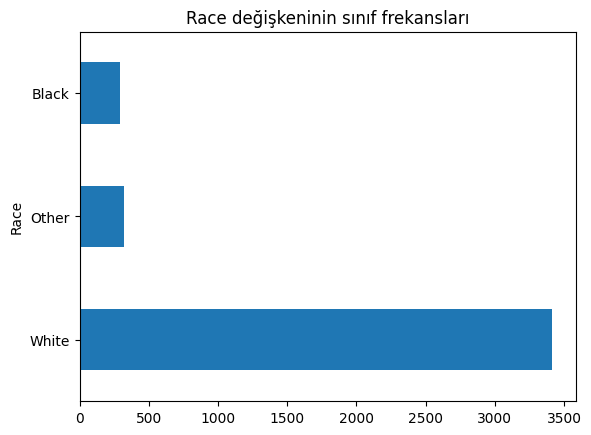

In [62]:
data1["Race"].value_counts().plot.barh().set_title("Race değişkeninin sınıf frekansları"); # ; grafiğin bilgisini kaldırıyor

<Axes: xlabel='T Stage ', ylabel='Survival Months'>

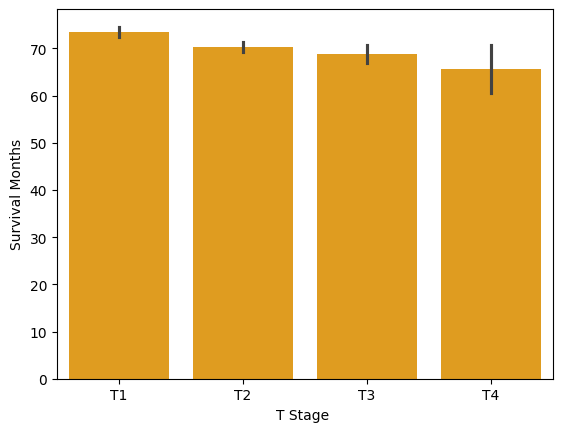

In [65]:
sns.barplot(x="T Stage ", y="Survival Months",data=data1, color="orange")

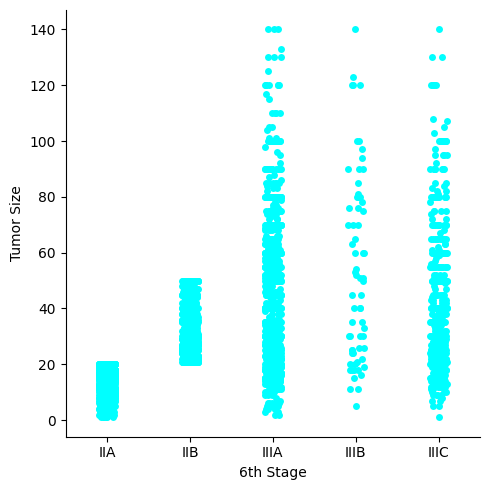

In [125]:
sns.catplot(x="6th Stage", y="Tumor Size", data=data1, color="cyan");

- 6.evredeki hastaların kanserin vücudun diğer bölgelerine yayıldığı evreleriyle, tümor boyutuyla arasındaki ilişkiye bakıyoruz. Tümör, tümör boyutuna bakılarak, yoğunlukla koltuk altı lenf bezlerine yayılmıştır.

C:\Users\incie\AppData\Local\Temp\ipykernel_16252\163364850.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x="Grade", y="Age",hue="Marital Status", data=data1, color="purple") ;


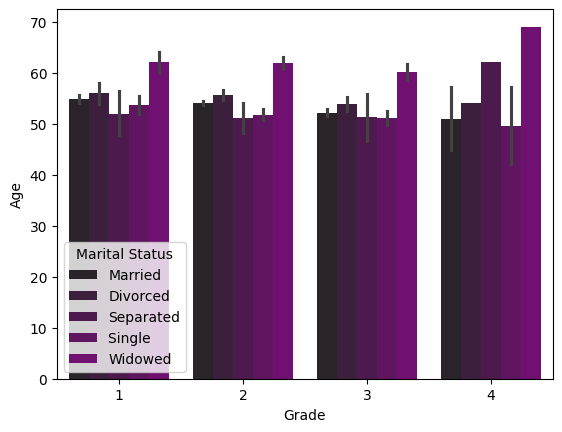

In [81]:
sns.barplot(x="Grade", y="Age",hue="Marital Status", data=data1, color="purple") ;

- yukarıdaki grafiği YORUMLA

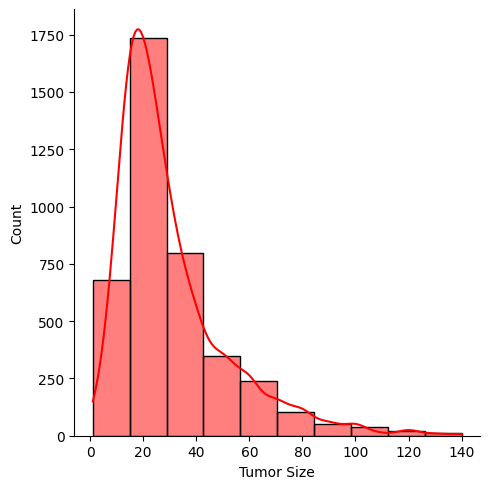

In [93]:
sns.displot(data1["Tumor Size"], bins=10, color="red", kde=True);
# bins=10 olursa 10 tane çubuk olucak şekilde grafik ayarlanır
# kde=False olursa çizgi olmaz
# sadece çizgi için hist=False olmalı

C:\Users\incie\AppData\Local\Temp\ipykernel_16252\724977210.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1["Survival Months"], shade=True, color="green");


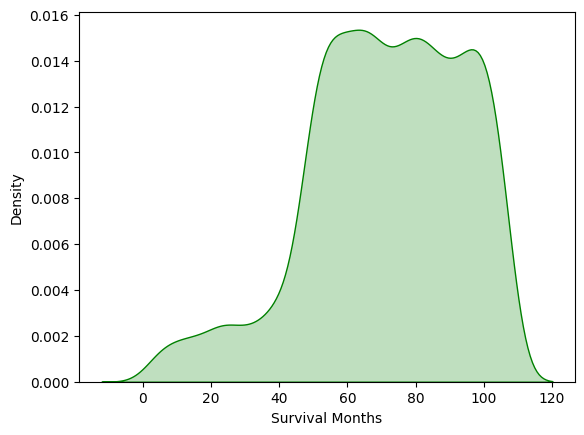

In [97]:
sns.kdeplot(data1["Survival Months"], shade=True, color="green");


c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\incie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

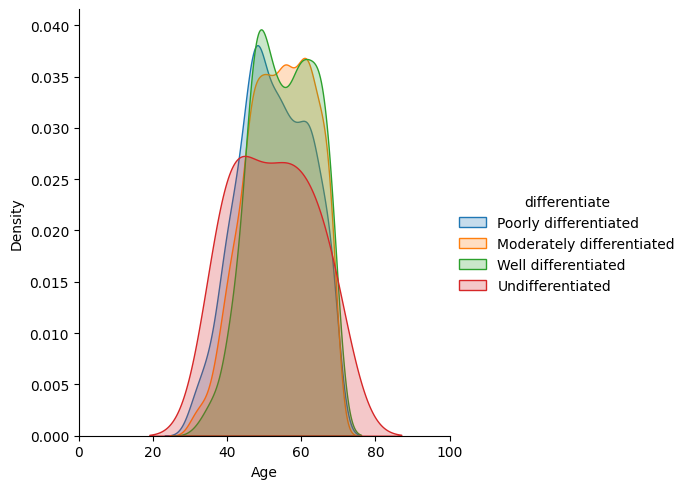

In [122]:
((sns.FacetGrid(data1,
               hue="differentiate",
               height=5,
               xlim=(0, 100)))
.map(sns.kdeplot, "Age", shade=True)
.add_legend());

- 60 yaşındaki bir hasta için yoğunluklarına bakılırsa kanser orta derece ve iyi bir prognoza(hastalığı atlatma şansı) sahip

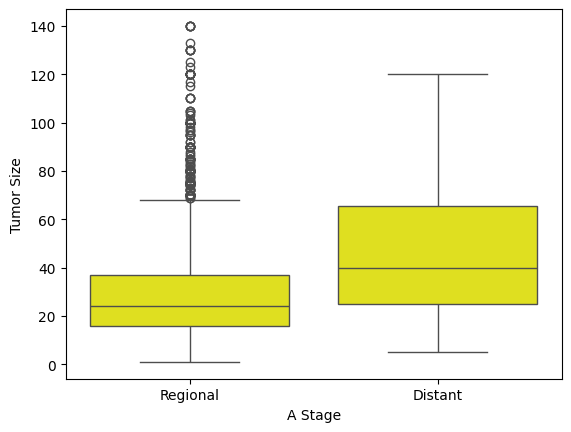

In [146]:
sns.boxplot(x="A Stage", y="Tumor Size",color="yellow", data=data1);

- Regional= kanserin meme dokusu dışındaki diğer lenf bezlerine yayıldığını
- Distant= kanserin meme dokusu dışındaki diğer dokulara yayıldığını

Grafiğe baktığımda büyük tümorlar genellikle dokulara yayılmış. Fakat lenflere yayılan büyük tümörler mecvut

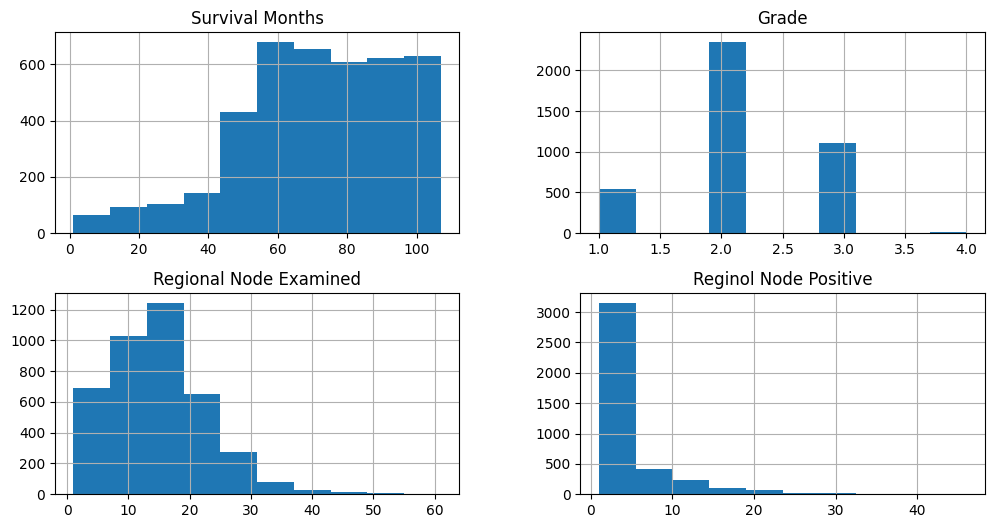

In [153]:
plt.rcParams['figure.figsize'] = (12,6)
viz = data1[['Survival Months','Grade','Regional Node Examined','Reginol Node Positive']]
viz.hist()
plt.show()

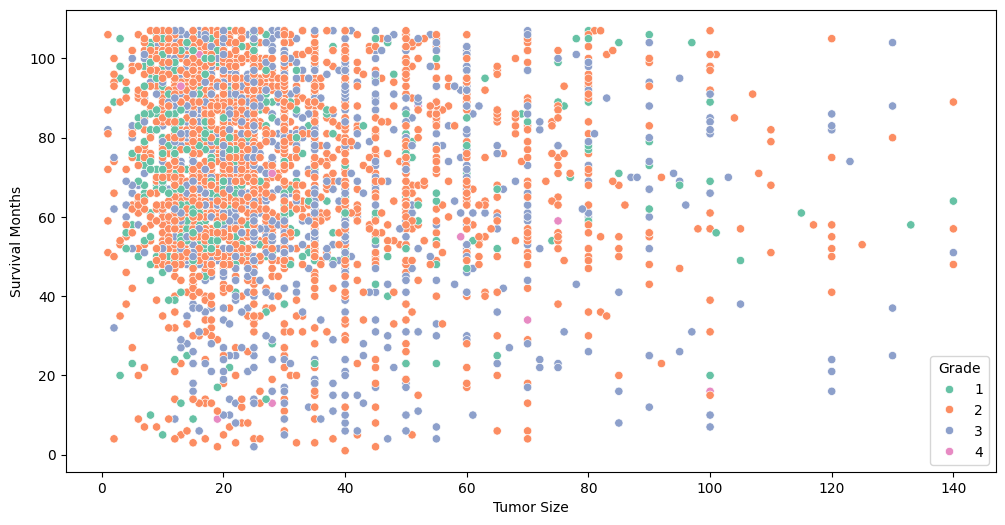

In [171]:
# Korelasyon Grafikleri
sns.scatterplot(x="Tumor Size", y="Survival Months", hue="Grade",palette="Set2", data=data1);

<Axes: xlabel='Survival Months', ylabel='Tumor Size'>

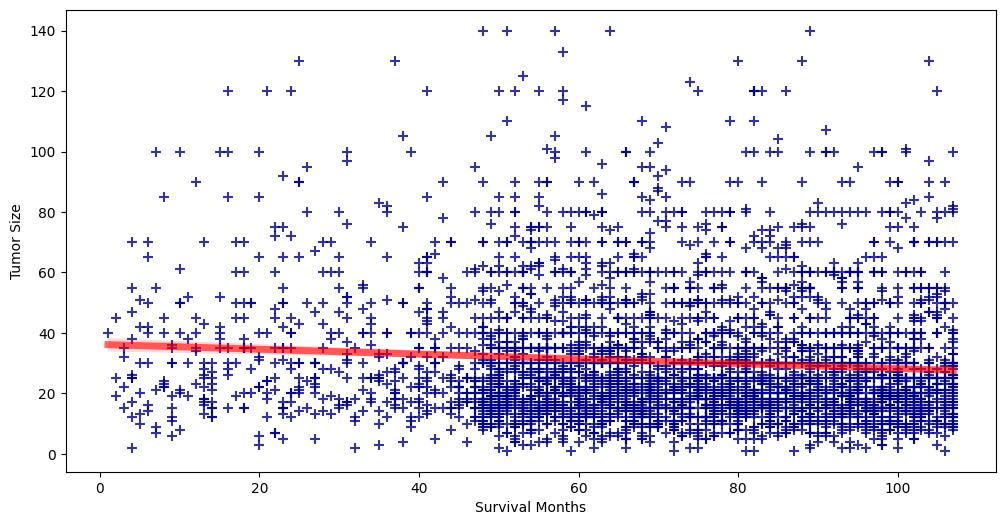

In [155]:
sns.regplot(
    x=data1['Survival Months'],
    y=data1['Tumor Size'],
    marker= "+",
    line_kws={
        "color":"red",
        "alpha":0.6,
        "lw":5 
    },
    scatter_kws={
        "color":"darkblue",
        "s":50
    }
    )

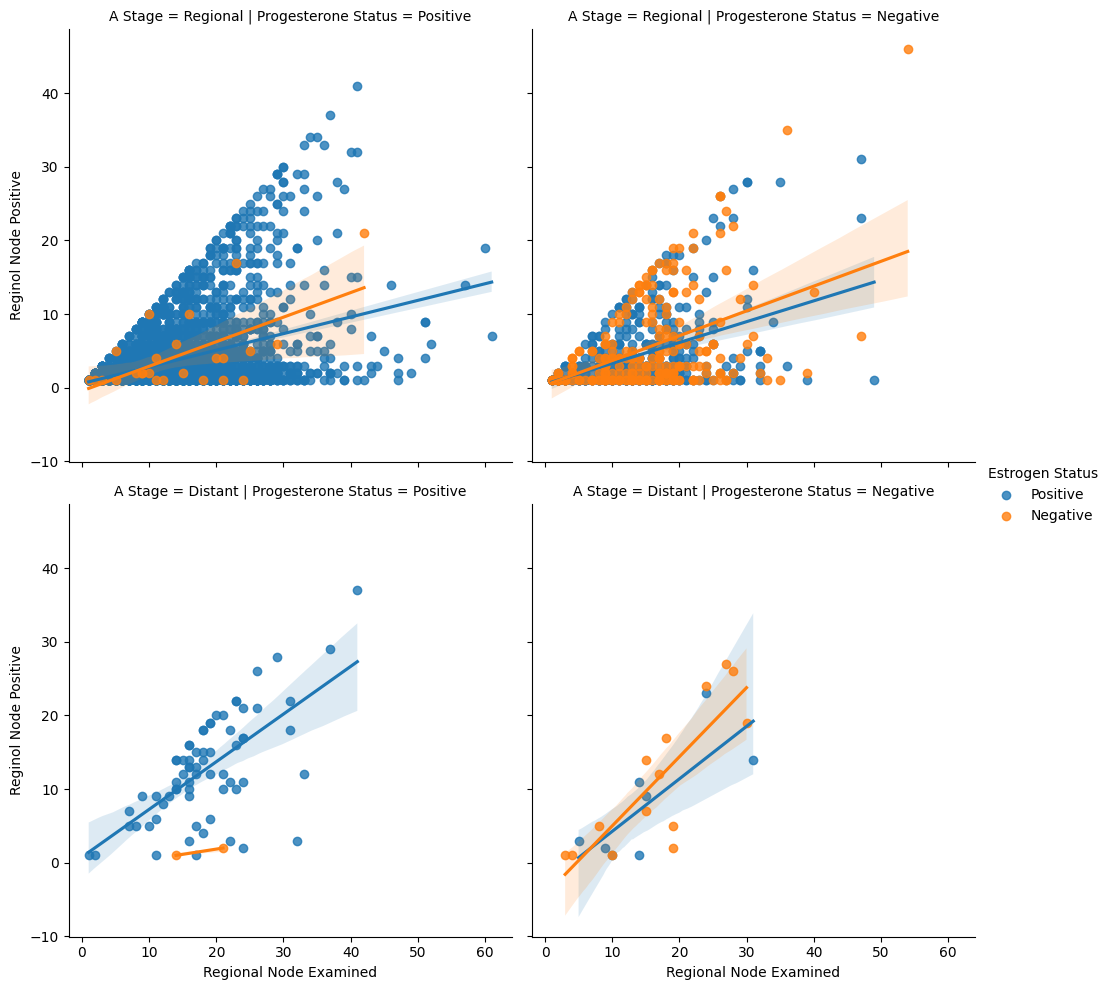

In [174]:
sns.lmplot(x="Regional Node Examined", y="Reginol Node Positive", hue="Estrogen Status", col="Progesterone Status", row="A Stage", data=data1);

- Progesterone ve Estrogen arasında doğrusal ilişki var gibi çünkü progesterone (+) oldukça estrogende (+) olma eğiliminde
- Dokulara(distant) yayılımda ise progesterone ve estrogenin pozitif olma durumuna rastlanmış

In [176]:
data1.groupby("differentiate")["Tumor Size"].mean()

differentiate
Moderately differentiated    29.729051
Poorly differentiated        33.823582
Undifferentiated             44.157895
Well differentiated          26.364641
Name: Tumor Size, dtype: float64

- farklılaşmamış kanser hücreleri daha büyük tümöre sahipler

In [186]:
correlation_matrix = data1[["Age", "Grade", "Regional Node Examined", "Reginol Node Positive", "Tumor Size", "Survival Months"]].corr()
print(correlation_matrix)

                             Age     Grade  Regional Node Examined  \
Age                     1.000000 -0.099294               -0.033345   
Grade                  -0.099294  1.000000                0.084416   
Regional Node Examined -0.033345  0.084416                1.000000   
Reginol Node Positive   0.012586  0.135319                0.411580   
Tumor Size             -0.077215  0.119367                0.104352   
Survival Months        -0.009390 -0.067669               -0.022054   

                        Reginol Node Positive  Tumor Size  Survival Months  
Age                                  0.012586   -0.077215        -0.009390  
Grade                                0.135319    0.119367        -0.067669  
Regional Node Examined               0.411580    0.104352        -0.022054  
Reginol Node Positive                1.000000    0.242322        -0.135214  
Tumor Size                           0.242322    1.000000        -0.086901  
Survival Months                     -0.135214  

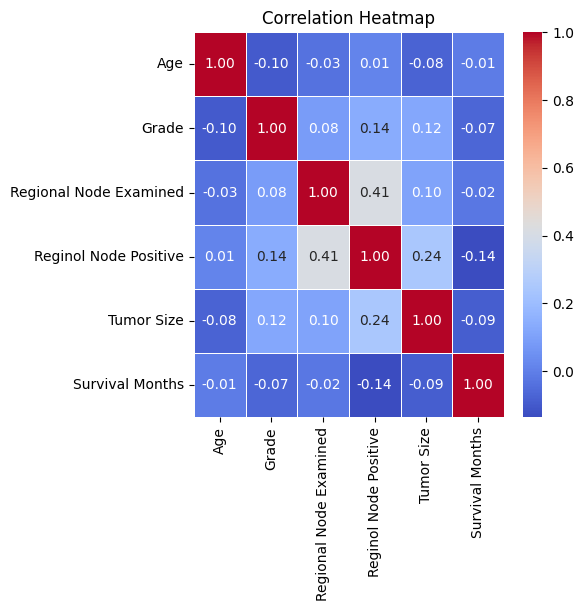

In [190]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Veri setimdeki değişkenler arasında düşük korelasyon olduğundan bu nedenle doğrusal olmayan modellerden yararlanacağım

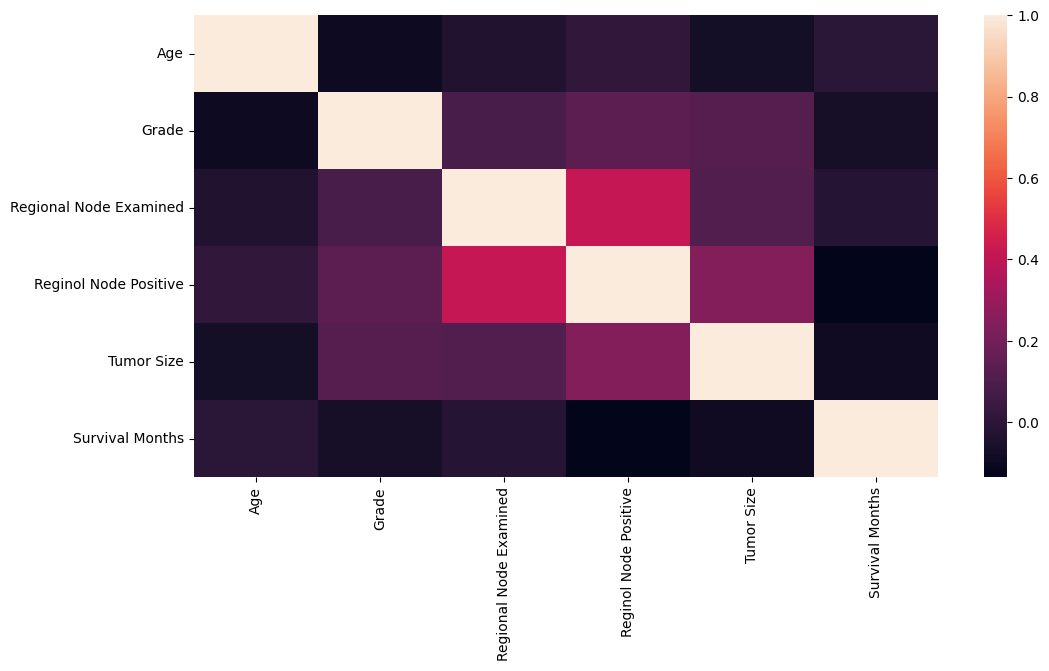

In [191]:
column_values=["Age", "Grade", "Regional Node Examined", "Reginol Node Positive", "Tumor Size", "Survival Months"]
sns.heatmap(correlation_matrix, xticklabels=column_values, yticklabels=column_values);

### Sonra yapılacak adımlar:
- 2. Veri ön işleme
- 3. Model seçimi:
     3.1- Random Forest
     3.2- KNN
- 4. Evaluation